In [ ]:
                                                  !pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=9b511fc5790be2827ba219cc09268942ac7c2cca36ce8ffc1bc3ea2e58f80041
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install pandas.plotting

ERROR: Could not find a version that satisfies the requirement pandas.plotting (from versions: none)
ERROR: No matching distribution found for pandas.plotting


In [ ]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
import numpy as np


In [ ]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.Builder().appName("Project_DDAM_parquet").getOrCreate()

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql import SparkSession
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.sql.functions import expr


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
sqlCtx= SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("parquet_example").getOrCreate()

# Specify the path to the Parquet folder using a wildcard character
parquet_folder_path = '/content/drive/MyDrive/Colab Notebooks/content/output.parquet'

# Read the Parquet files into a DataFrame
df = spark.read.parquet(parquet_folder_path)

# Show the DataFrame
df.show()



+-------------------+--------------------+------+----+---------+--------+--------+-------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------------+---------------+-------------+-------------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+-------+-------+---------+--------+-------------------+------------------+--------------------+-------------------+------------------------+------------------------+--------------------------+-------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Oper

In [ ]:
# Count the number of True and False values in the column
count_true = df.filter(col("ArrDel15") == 1).count()
count_false = df.filter(col("ArrDel15") == 0).count()

# Print the results
print("Count of True values:", count_true)
print("Count of False values:", count_false)

Count of True values: 1086881
Count of False values: 4491737


In [ ]:
df.count()

5578618

In [ ]:
df.printSchema()

root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: string (nullable = true)
 |-- Tail_Number: string (nullable = true)
 |-- Flight_Number_Operating_Airline: long (nullable = true)
 |-- OriginAirportID: long (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestAirportID: long (nullable = 

In [ ]:
# Replace boolean values with integers
df = df.withColumn("Cancelled", when(df["Cancelled"] == True, 1).otherwise(0))

# Show the modified DataFrame
df.show()

+-------------------+--------------------+------+----+---------+--------+--------+-------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------------+---------------+-------------+-------------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+-------+-------+---------+--------+-------------------+------------------+--------------------+-------------------+------------------------+------------------------+--------------------------+-------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Oper

In [ ]:
df.show()

+-------------------+--------------------+------+----+---------+--------+--------+-------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------------+---------------+-------------+-------------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+-------+-------+---------+--------+-------------------+------------------+--------------------+-------------------+------------------------+------------------------+--------------------------+-------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Oper

In [ ]:
categorical_columns = ['Origin', 'Dest','DepTimeBlk', 'ArrTimeBlk', 'Airline', 'DestCityName']

# Create a list of StringIndexers for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]

# Create a pipeline with the StringIndexers
pipeline = Pipeline(stages=indexers)

# Fit and transform the data using the pipeline
df_transformed = pipeline.fit(df).transform(df)


In [ ]:
df_transformed.show()

+-------------------+--------------------+------+----+---------+--------+--------+-------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------------+---------------+-------------+-------------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+-------+-------+---------+--------+-------------------+------------------+--------------------+-------------------+------------------------+------------------------+--------------------------+-------------------------+------------+----------+----------------+----------------+-------------+------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Shar

In [ ]:
# Specify the columns to keep
selected_columns = [ 'DepDelay',
    'Origin_index', 'Dest_index','scaled_Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'Flight_Number_Marketing_Airline','ArrDel15', 'DestCityName_index'
]

# Filter and select the specified columns
filtered_dataframe = df_transformed.select(*[col(column) for column in selected_columns])

filtered_dataframe.show()


+--------+------------+----------+--------------------+-----+---------+----------+----------------+----------------+-------------+-------------------------------+--------+------------------+
|DepDelay|Origin_index|Dest_index|     scaled_Distance|Month|DayOfWeek|DayofMonth|DepTimeBlk_index|ArrTimeBlk_index|Airline_index|Flight_Number_Marketing_Airline|ArrDel15|DestCityName_index|
+--------+------------+----------+--------------------+-----+---------+----------+----------------+----------------+-------------+-------------------------------+--------+------------------+
|    -3.0|         0.0|       3.0| 0.34592084006462037|    1|        4|        18|             9.0|             6.0|          1.0|                           2001|     0.0|               4.0|
|    -4.0|         3.0|      36.0|  0.5098949919224556|    3|        7|        18|            12.0|             8.0|          1.0|                           1170|     0.0|              32.0|
|    72.0|        20.0|      18.0| 0.20961227

In [ ]:
feature_columns =[ 'DepDelay',
    'Origin_index', 'Dest_index','scaled_Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'Flight_Number_Marketing_Airline', 'DestCityName_index'
]
# Assemble features into a single column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Create the Logistic Regression model
lr_classifier = LogisticRegression(
    labelCol='ArrDel15',
    featuresCol="features",
    maxIter=20,
    regParam=0.2
)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, lr_classifier])

# Split the data into training and testing sets
(train_data, test_data) = filtered_dataframe.randomSplit([0.7, 0.3], seed=1234)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(
    labelCol='ArrDel15',
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")




Accuracy: 0.8312361992009647


Confusion Matrix:
[[1348376       3]
 [ 282553   43337]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91   1348379
         1.0       1.00      0.13      0.23    325890

    accuracy                           0.83   1674269
   macro avg       0.91      0.57      0.57   1674269
weighted avg       0.86      0.83      0.77   1674269



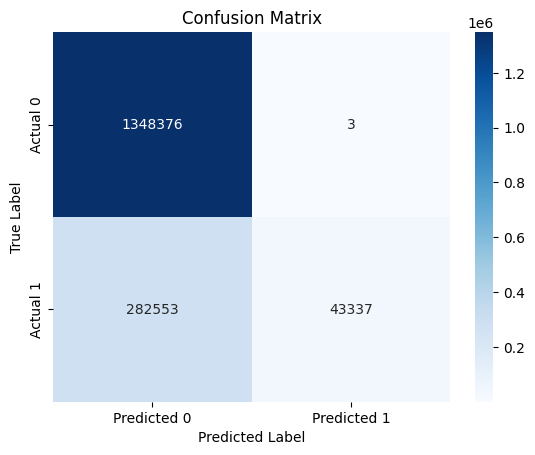

In [ ]:
predictions_pd = predictions.select(['prediction', 'ArrDel15']).toPandas()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report using scikit-learn
report = classification_report(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the classification report
print("Classification Report:")
print(report)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
feature_columns =[ 'DepDelay',
    'Origin_index', 'Dest_index','scaled_Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'Flight_Number_Marketing_Airline', 'DestCityName_index'
]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(filtered_dataframe)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.8, 0.2], seed=1234)

# Define the neural network layers (adjust the layers according to your problem)
layers = [len(feature_columns), 6, 4, 2]  # input layer, hidden layers, output layer

# Create the Multilayer Perceptron Classifier
mlp = MultilayerPerceptronClassifier(layers=layers, blockSize=128, seed=1234, featuresCol='features', labelCol='ArrDel15')

# Train the model
model = mlp.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(metricName='accuracy', labelCol='ArrDel15')
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9217455203717229


Confusion Matrix:
[[869092  29889]
 [ 57434 159470]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95    898981
         1.0       0.84      0.74      0.79    216904

    accuracy                           0.92   1115885
   macro avg       0.89      0.85      0.87   1115885
weighted avg       0.92      0.92      0.92   1115885



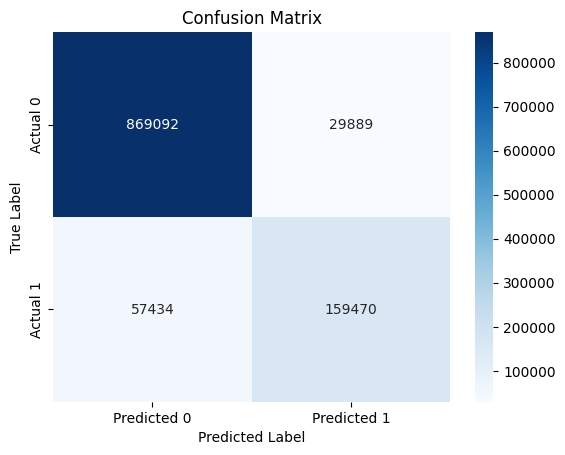

In [ ]:
predictions_pd = predictions.select(['prediction', 'ArrDel15']).toPandas()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report using scikit-learn
report = classification_report(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the classification report
print("Classification Report:")
print(report)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline


feature_columns =[ 'DepDelay',
    'Origin_index', 'Dest_index','scaled_Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'Flight_Number_Marketing_Airline', 'DestCityName_index'
]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Create an SVM classifier
svm = LinearSVC(maxIter=10, regParam=0.1, labelCol='ArrDel15')

# Create a pipeline with the vector assembler and SVM classifier
pipeline = Pipeline(stages=[vector_assembler, svm])

# Split the data into training and testing sets
(training_data, testing_data) = filtered_dataframe.randomSplit([0.8, 0.2], seed=123)

# Train the SVM model
model = pipeline.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="ArrDel15", metricName="areaUnderROC")
area_under_roc = evaluator.evaluate(predictions)

Confusion Matrix:
[[899077     52]
 [135525  82952]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    899129
         1.0       1.00      0.38      0.55    218477

    accuracy                           0.88   1117606
   macro avg       0.93      0.69      0.74   1117606
weighted avg       0.89      0.88      0.86   1117606



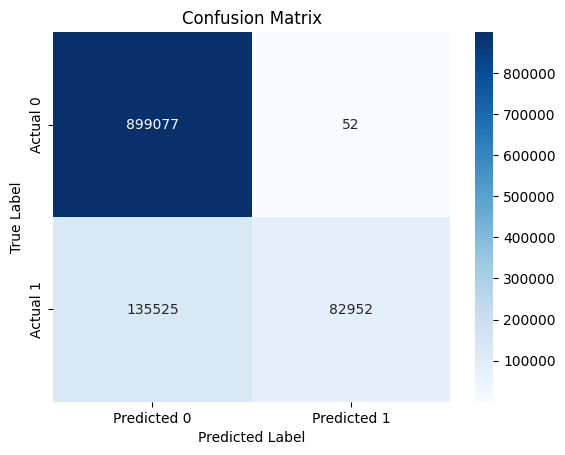

In [ ]:
predictions_pd = predictions.select(['prediction', 'ArrDel15']).toPandas()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report using scikit-learn
report = classification_report(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the classification report
print("Classification Report:")
print(report)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create a VectorAssembler
vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Create a Logistic Regression model
random_forest = RandomForestClassifier(featuresCol='features', labelCol= 'ArrDel15', numTrees=15, maxBins = 400, maxDepth = 10,  impurity = 'entropy')

# Create a Pipeline
pipeline = Pipeline(stages=[vec_assembler, random_forest])

# Split the data into training and testing sets
(training_data, testing_data) = filtered_dataframe.randomSplit([0.7, 0.3], seed=42)

# Train the model
rf_model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = rf_model.transform(testing_data)

# Evaluate the model using MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='ArrDel15', metricName='accuracy')
accuracy = evaluator_accuracy.evaluate(predictions)

# Display the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.9297637383186503


Confusion Matrix:
[[1321835   25124]
 [  92439  234424]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96   1346959
         1.0       0.90      0.72      0.80    326863

    accuracy                           0.93   1673822
   macro avg       0.92      0.85      0.88   1673822
weighted avg       0.93      0.93      0.93   1673822



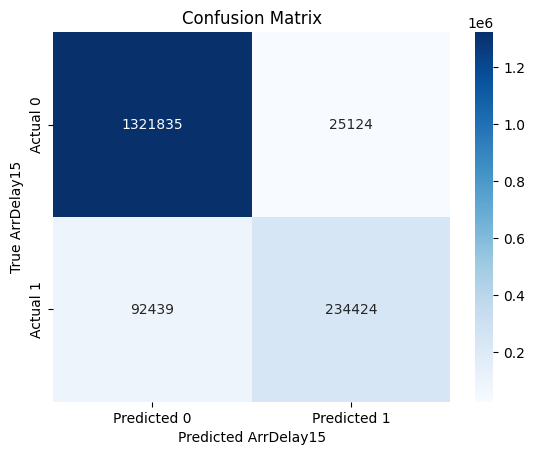

In [ ]:
predictions_pd = predictions.select(['prediction', 'ArrDel15']).toPandas()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report using scikit-learn
report = classification_report(predictions_pd['ArrDel15'], predictions_pd['prediction'])

# Display the classification report
print("Classification Report:")
print(report)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted ArrDelay15')
plt.ylabel('True ArrDelay15')
plt.title('Confusion Matrix')
plt.show()

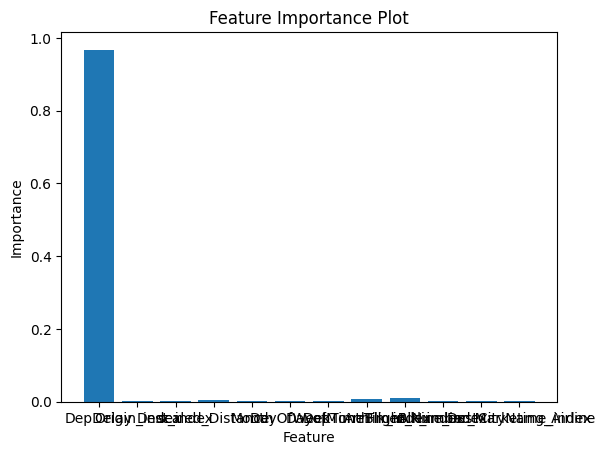

In [ ]:
feature_importance = rf_model.stages[-1].featureImportances.toArray()

# Create a bar plot for feature importance
plt.bar(feature_columns, feature_importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.show()